In [1]:
import numpy as np  # Imports NumPy library
import pandas as pd  # Imports Pandas library

In [2]:
df = pd.read_csv('laptop_data.csv')  # Reads data from 'laptop_data.csv' into a pandas DataFrame named 'df'

In [3]:
# Preview the initial rows of the DataFrame for preliminary inspection
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
# Returns the dimensions (rows, columns) of the DataFrame
df.shape

(1303, 12)

In [5]:
# Provides a summary of DataFrame structure, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
# Counts total duplicate rows present in the DataFrame
df.duplicated().sum()

np.int64(0)

In [7]:
# Counts missing (NaN) values in each column of the DataFrame
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
# Remove the unnecessary column 'Unnamed: 0' from the DataFrame permanently
df.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
# Remove 'GB' from 'Ram' column values and convert to integer type
df['Ram'] = df['Ram'].str.replace('GB', '').astype('int32')

# Remove 'kg' from 'Weight' column values and convert to float type
df['Weight'] = df['Weight'].str.replace('kg', '').astype('float32')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [11]:
# Import seaborn library for statistical data visualization
import seaborn as sns

C:\Users\User\AppData\Local\Temp\ipykernel_15772\1921355415.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

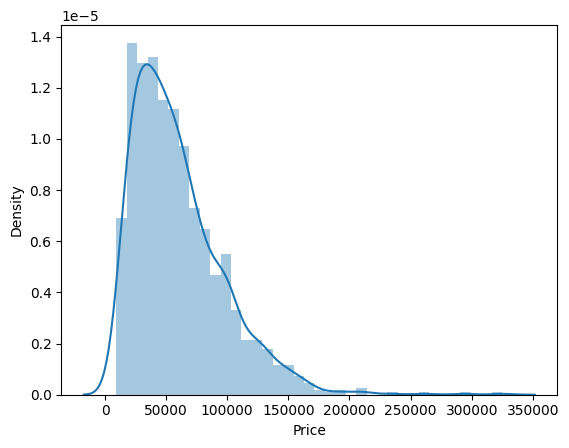

In [12]:
# Plot the distribution of laptop prices to assess its shape and spread
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

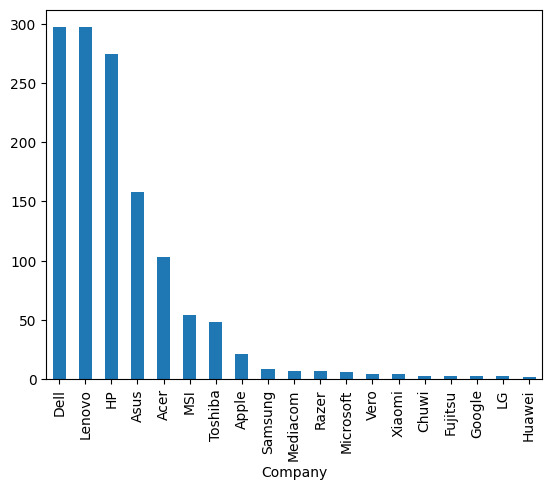

In [13]:
# Visualize the frequency of laptops by company as a bar chart
df['Company'].value_counts().plot(kind='bar')

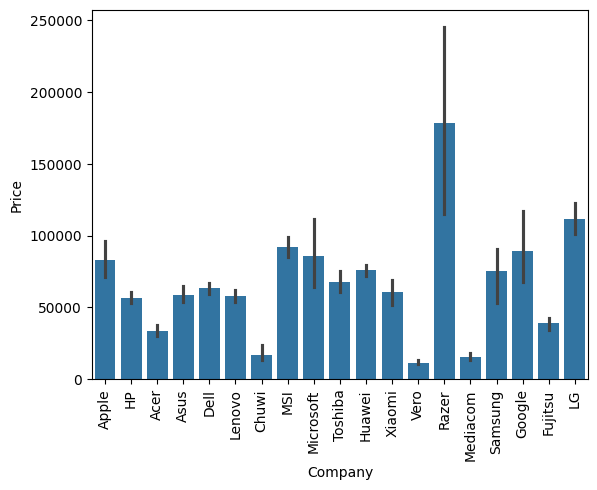

In [14]:
import matplotlib.pyplot as plt

# Compare average laptop prices across different companies
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

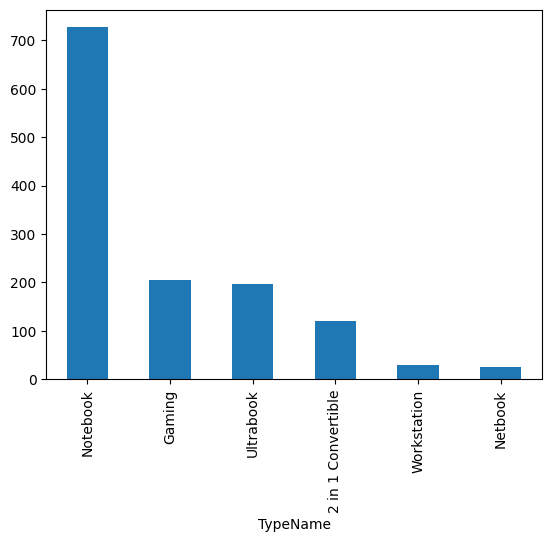

In [15]:
# Visualize frequency of laptops by type
df['TypeName'].value_counts().plot(kind='bar')

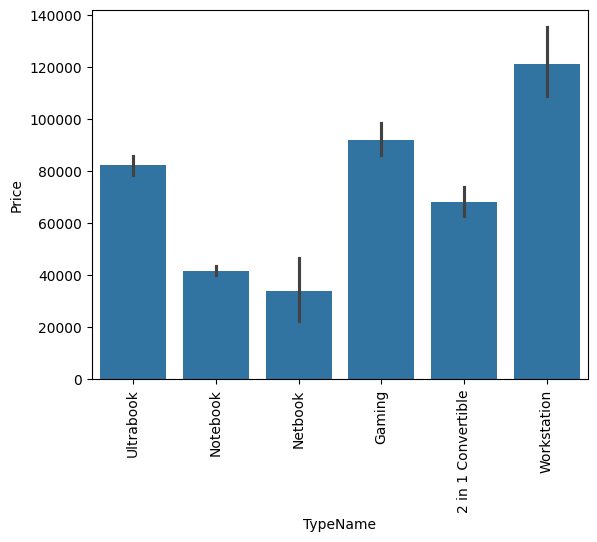

In [16]:
# Compare average prices across different laptop types
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [17]:
# Inspect frequency of different screen resolutions
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [18]:
# Create a binary column indicating presence (1) or absence (0) of a touchscreen
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [19]:
# Display a random sample of 5 rows from the DataFrame
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
632,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,256GB SSD,Intel UHD Graphics 620,Windows 10,1.80,44169.12,0
1117,Razer,Ultrabook,12.5,Touchscreen / 4K Ultra HD 3840x2160,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.25,54825.12,1
1137,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.50,41771.52,0
258,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.14,133146.72,0
993,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.30,71874.72,0


<Axes: xlabel='Touchscreen'>

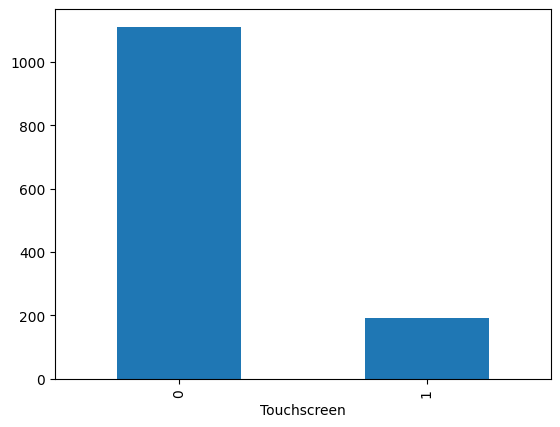

In [20]:
# Visualize the count of laptops with and without a touchscreen
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

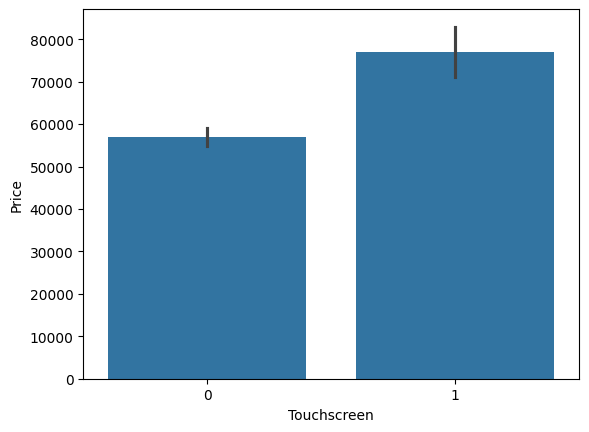

In [21]:
# Compare average laptop prices based on touchscreen availability
sns.barplot(x=df['Touchscreen'], y=df['Price'])

In [22]:
# Create a binary column indicating presence (1) or absence (0) of IPS display
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [23]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='IPS'>

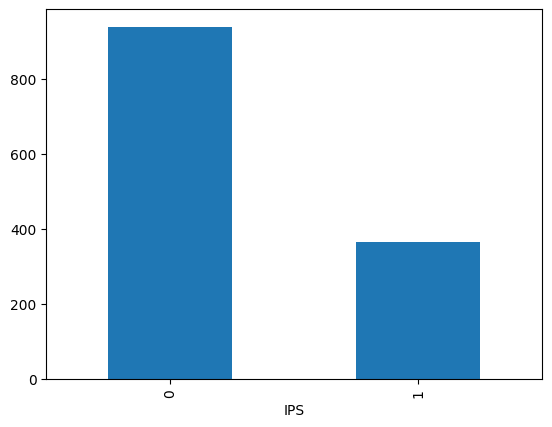

In [24]:
# Visualize the count of laptops with and without an IPS display
df['IPS'].value_counts().plot(kind='bar')

<Axes: xlabel='IPS', ylabel='Price'>

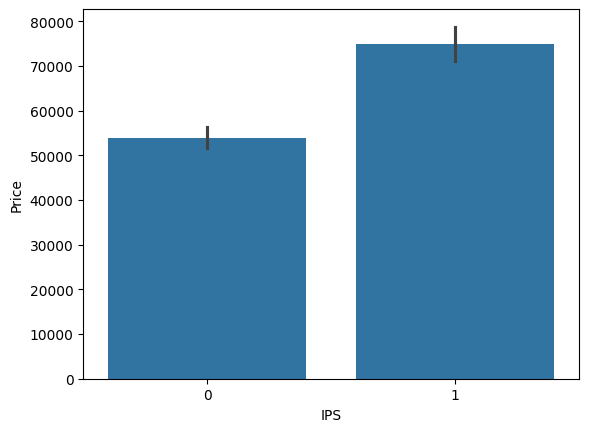

In [25]:
# Compare average laptop prices based on IPS display availability
sns.barplot(x=df['IPS'], y=df['Price'])

In [26]:
# Split the 'ScreenResolution' column into two parts at 'x', extracting width and height
temp = df['ScreenResolution'].str.split('x', n=1, expand=True)

In [27]:
# Extract screen width and height from the split 'ScreenResolution' column
df['X_res'] = temp[0]
df['Y_res'] = temp[1]

In [28]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [29]:
# Clean and extract numerical values from the 'X_res' column
df['X_res'] = df['X_res'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

In [30]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [31]:
# Convert screen resolution width and height to integer type
df['X_res'] = df['X_res'].astype(int)
df['Y_res'] = df['Y_res'].astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [33]:
# Compute Pixels Per Inch (PPI) using screen resolution and screen size
df['ppi'] = ((df['X_res']**2 + df['Y_res']**2) ** 0.5) / df['Inches']

In [34]:
# Remove redundant columns after extracting relevant features
df.drop(columns=['ScreenResolution', 'X_res', 'Y_res', 'Inches'], inplace=True)

In [35]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [36]:
# Display the frequency of unique CPU models
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [37]:
# Extract the first three words from the 'Cpu' column to create a new 'CpuName' feature
df['CpuName'] = df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [38]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CpuName
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [39]:
# Classify CPUs into categories based on brand and model
def processor(text):
    if text in ['Intel Core i7', 'Intel Core i5', 'Intel Core i3']:
        return text
    elif text.split()[0] == 'Intel':
        return 'Other Intel processor'
    else:
        return 'AMD processor'

In [40]:
# Categorize CPUs based on their brand and model
df['Cpu Brand'] = df['CpuName'].apply(processor)

In [41]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CpuName,Cpu Brand
925,Dell,Notebook,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.95,38889.0720,0,0,100.454670,Intel Core i5,Intel Core i5
1039,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.64,53839.9728,0,0,157.350512,Intel Core i5,Intel Core i5
595,Lenovo,Notebook,Intel Core i3 6100U 2.3GHz,8,1TB HDD,Intel HD Graphics 520,Windows 10,2.29,24455.5200,0,0,100.454670,Intel Core i3,Intel Core i3
183,Toshiba,Notebook,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,2.00,42251.0400,0,0,100.454670,Intel Core i5,Intel Core i5
887,Asus,Gaming,Intel Core i5 7300HQ 2.5GHz,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,72988.2720,0,0,127.335675,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu Brand'>

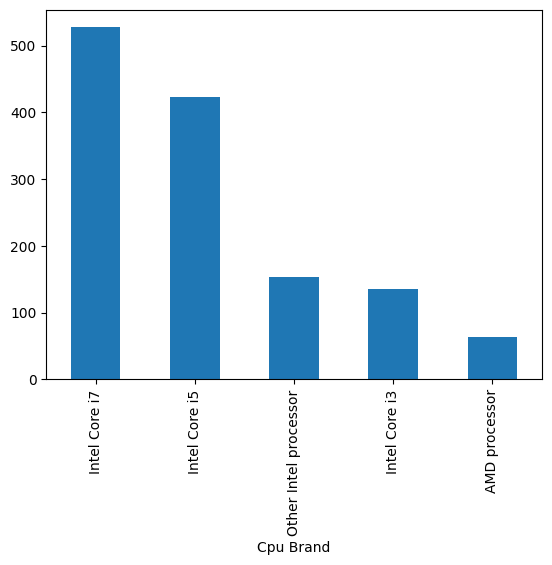

In [42]:
# Visualize the distribution of CPU brands in the dataset
df['Cpu Brand'].value_counts().plot(kind='bar')

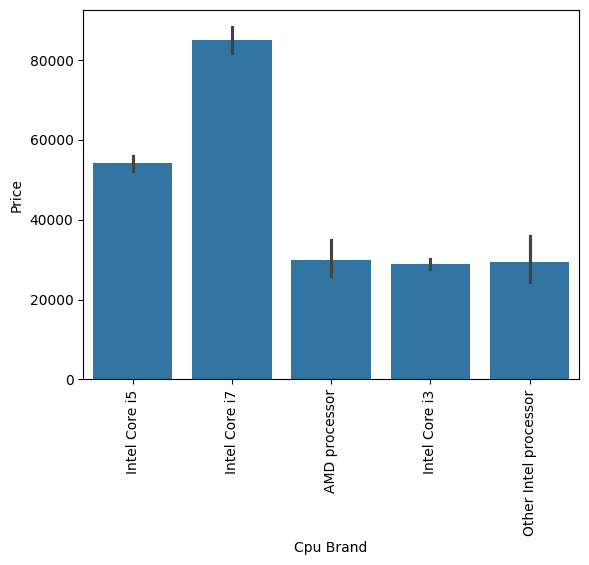

In [43]:
# Compare average laptop prices across different CPU brands
sns.barplot(x=df['Cpu Brand'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [44]:
# Remove redundant CPU-related columns after feature extraction
df.drop(columns=['Cpu', 'CpuName'], inplace=True)

In [45]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

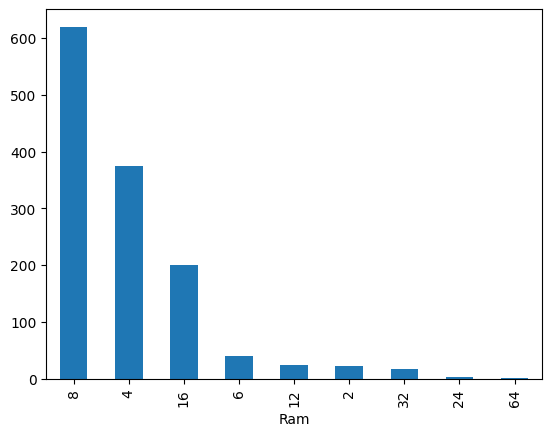

In [46]:
# Visualize the distribution of RAM sizes
df['Ram'].value_counts().plot(kind='bar')

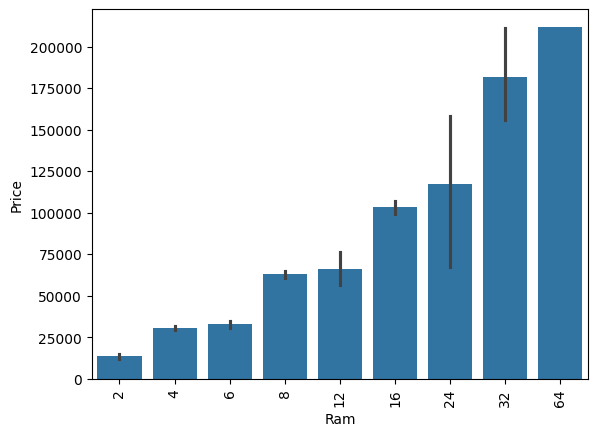

In [47]:
# Compare average laptop prices based on RAM size
sns.barplot(x=df['Ram'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [48]:
# Display the frequency of unique memory configurations
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [49]:
# Clean and preprocess the 'Memory' column
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

# Split memory configurations into two parts if multiple storage types exist
new = df["Memory"].str.split("+", n=1, expand=True)

df["first"] = new[0].str.strip()
df["second"] = new[1]

# Identify storage type for the first memory layer
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Extract numerical storage size for the first layer
df['first'] = df['first'].str.replace(r'\D', '', regex=True)

# Handle missing values in the second memory layer
df["second"].fillna("0", inplace=True)

# Identify storage type for the second memory layer
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Extract numerical storage size for the second layer
df['second'] = df['second'].str.replace(r'\D', '', regex=True)

# Convert storage sizes to integer type
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

# Compute total storage capacity for each storage type
df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"])

# Remove unnecessary intermediate columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                 'Layer2Flash_Storage'], inplace=True)


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3653276251.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3653276251.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["second"].fillna("0", inplace=True)


In [50]:
df.sample(8)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
907,Acer,Notebook,4,16 Flash Storage,Intel HD Graphics,Chrome OS,2.20,19127.5200,0,1,141.211998,Other Intel processor,0,0,0,16
1157,Lenovo,Ultrabook,12,512 SSD,Intel HD Graphics 520,Windows 7,1.40,122490.7200,0,0,157.350512,Intel Core i7,0,512,0,0
1087,Lenovo,Notebook,8,180 SSD,Intel HD Graphics 520,Windows 7,1.70,63882.7200,0,0,157.350512,Intel Core i5,0,180,0,0
1172,Asus,Notebook,4,500 HDD,Intel HD Graphics,Windows 10,2.20,19660.3200,0,0,100.454670,Other Intel processor,500,0,0,0
57,Asus,Notebook,4,256 SSD,Intel HD Graphics 620,Windows 10,2.00,31232.2032,0,0,100.454670,Intel Core i5,0,256,0,0
717,Lenovo,Notebook,4,500 HDD,AMD Radeon R4,Windows 10,2.19,15877.4400,0,0,100.454670,AMD processor,500,0,0,0
573,Lenovo,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,2.30,44222.4000,0,0,141.211998,Intel Core i5,0,256,0,0
108,MSI,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.20,69210.7200,0,0,141.211998,Intel Core i7,1000,256,0,0


In [51]:
# Remove the original 'Memory' column after extracting relevant storage features
df.drop(columns=['Memory'], inplace=True)

In [52]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [53]:
# Remove less common storage types after extracting key storage features
df.drop(columns=['Hybrid', 'Flash_Storage'], inplace=True)

In [54]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [55]:
# Display the frequency of unique GPU models
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [56]:
# Extract the GPU brand by taking the first word from the 'Gpu' column
df['Gpu Brand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [57]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [58]:
# Display the frequency of unique GPU brands
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [59]:
# Remove rows where the GPU brand is 'ARM' as it is not relevant
df = df[df['Gpu Brand'] != 'ARM']

In [60]:
# Display the frequency of unique GPU brands after filtering out 'ARM'
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

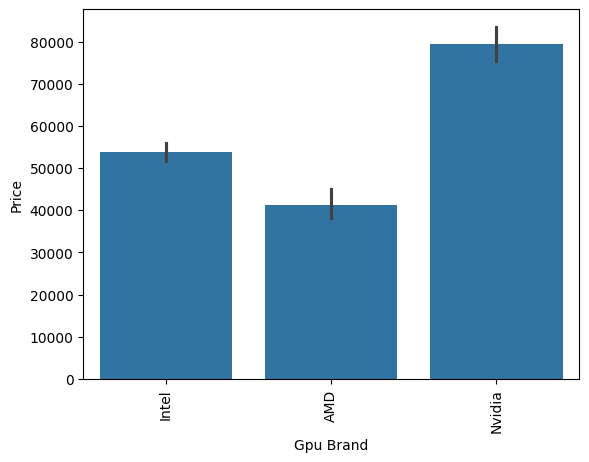

In [61]:
# Compare average laptop prices across different GPU brands
sns.barplot(x=df['Gpu Brand'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [62]:
# Remove the original 'Gpu' column after extracting GPU brand information
df.drop(columns=['Gpu'], inplace=True)

In [63]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [64]:
# Display the frequency of unique operating systems
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

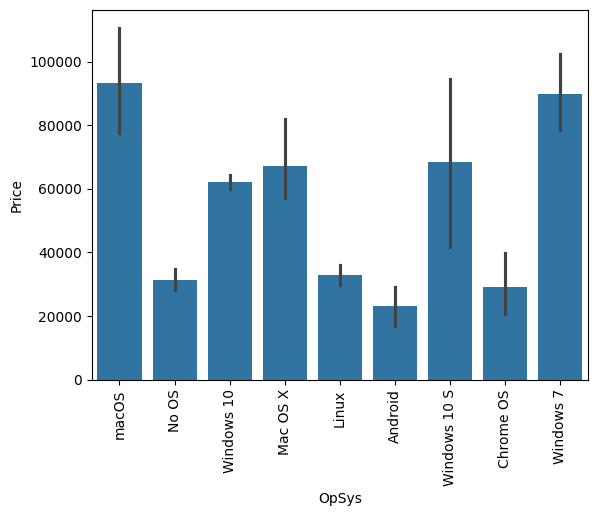

In [65]:
# Compare average laptop prices across different operating systems
sns.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [66]:
# Categorize operating systems into broader categories
def cat_os(inp):
    if inp in ['Windows 10', 'Windows 7', 'Windows 10 S']:
        return 'Windows'
    elif inp in ['macOS', 'Mac OS X']:
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [67]:
# Categorize operating systems into broader groups
df['os'] = df['OpSys'].apply(cat_os)

In [68]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [69]:
# Remove the original 'OpSys' column after categorizing operating systems
df.drop(columns=['OpSys'], inplace=True)

In [70]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


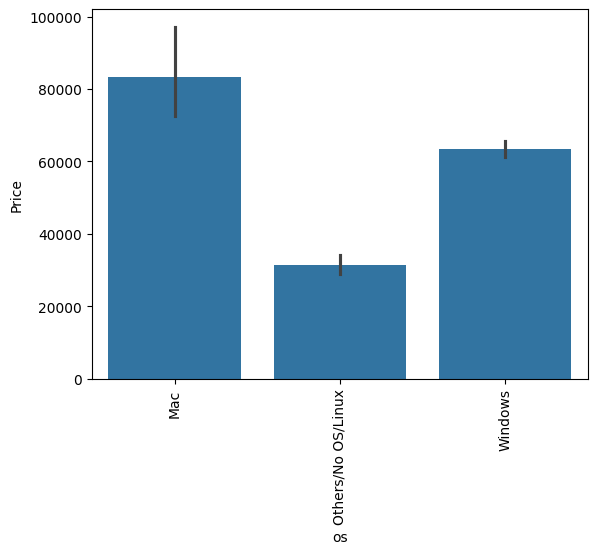

In [71]:
# Compare average laptop prices across different operating system categories
sns.barplot(x=df['os'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_15772\1202013219.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

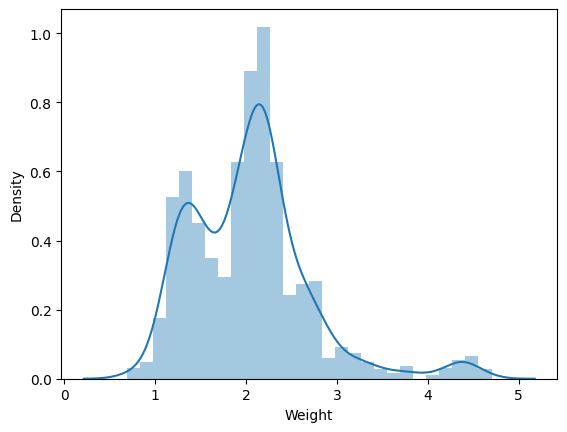

In [72]:
# Plot the distribution of laptop weights
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

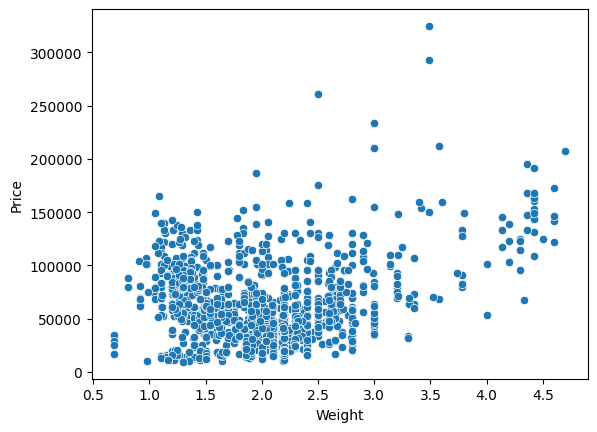

In [73]:
# Visualize the relationship between laptop weight and price
sns.scatterplot(x=df['Weight'], y=df['Price'])

C:\Users\User\AppData\Local\Temp\ipykernel_15772\582788201.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

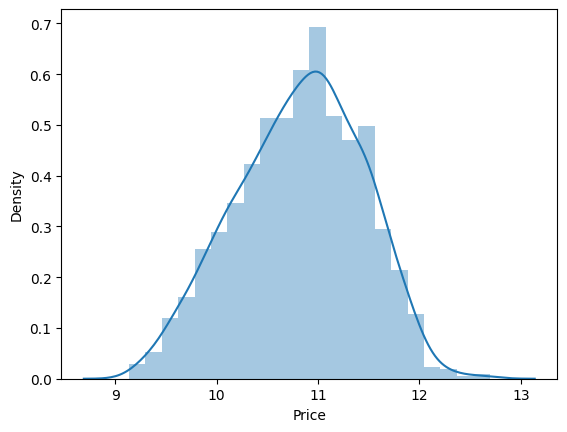

In [74]:
# Plot the distribution of log-transformed laptop prices to normalize skewness
sns.distplot(np.log(df['Price']))

In [75]:
# Define feature matrix (X) by removing the target variable 'Price'
X = df.drop(columns='Price')

# Define target variable (y) as the log-transformed laptop price
y = np.log(df['Price'])

In [76]:
X.head()

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [77]:
y.head()

0    11.175755
1    10.776777
2    10.329931
3    11.814476
4    11.473101
Name: Price, dtype: float64

In [78]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (85% train, 15% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

In [79]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu Brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [80]:
# Import necessary modules for data preprocessing and model evaluation
from sklearn.compose import ColumnTransformer  # Allows applying different transformations to different columns
from sklearn.pipeline import Pipeline  # Enables creating a machine learning workflow with preprocessing and modeling
from sklearn.preprocessing import OneHotEncoder  # Converts categorical variables into numerical format
from sklearn.metrics import r2_score, mean_absolute_error  # Metrics for model evaluation

In [81]:
# Import various regression models for comparison
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # Linear regression models with regularization
from sklearn.neighbors import KNeighborsRegressor  # K-Nearest Neighbors regression
from sklearn.tree import DecisionTreeRegressor  # Decision Tree regression model
from sklearn.ensemble import (
    RandomForestRegressor,  # Ensemble of decision trees for better performance
    GradientBoostingRegressor,  # Boosting technique for regression
    AdaBoostRegressor,  # Adaptive boosting regression
    ExtraTreesRegressor  # Similar to RandomForest but with more randomness
)
from sklearn.svm import SVR  # Support Vector Regression
from xgboost import XGBRegressor  # Extreme Gradient Boosting regression model


### Linear Regression

In [82]:
# Step 1: Apply one-hot encoding to categorical features and keep other features unchanged
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])  # Encode selected categorical columns
], remainder='passthrough')

# Step 2: Define the regression model (Linear Regression)
step2 = LinearRegression()

# Create a pipeline combining preprocessing and modeling steps
pipe = Pipeline([
    ('step1', step1),  # Apply column transformations
    ('step2', step2)   # Train Linear Regression model
])

# Train the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate model performance using R2 score and Mean Absolute Error (MAE)
print('R2 score:', r2_score(y_test, y_pred))  
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8073277448418649
MAE: 0.2101782797642894


### Ridge Regression

In [83]:
# Step 1: Apply one-hot encoding to categorical features and retain other features
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])  # Encode selected categorical columns
], remainder='passthrough')

# Step 2: Define the Ridge Regression model with regularization strength (alpha=10)
step2 = Ridge(alpha=10)

# Create a pipeline combining preprocessing and modeling
pipe = Pipeline([
    ('step1', step1),  # Apply column transformations
    ('step2', step2)   # Train Ridge Regression model
])

# Train the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate model performance using R2 score and Mean Absolute Error (MAE)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.812733103131181
MAE: 0.20926802242582948


### Lasso Regression

In [84]:
# Step 1: Apply one-hot encoding to categorical features and retain other features
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])  # Encode selected categorical columns
], remainder='passthrough')

# Step 2: Define the Lasso Regression model with regularization strength (alpha=0.001)
step2 = Lasso(alpha=0.001)

# Create a pipeline combining preprocessing and modeling
pipe = Pipeline([
    ('step1', step1),  # Apply column transformations
    ('step2', step2)   # Train Lasso Regression model
])

# Train the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate model performance using R2 score and Mean Absolute Error (MAE)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8071853945317105
MAE: 0.21114361613472565


### KNN

In [85]:
# Step 1: Apply one-hot encoding to categorical features and retain other features
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])  # Encode selected categorical columns
], remainder='passthrough')

# Step 2: Define the K-Nearest Neighbors Regressor with 3 neighbors
step2 = KNeighborsRegressor(n_neighbors=3)

# Create a pipeline combining preprocessing and modeling
pipe = Pipeline([
    ('step1', step1),  # Apply column transformations
    ('step2', step2)   # Train K-Nearest Neighbors Regressor
])

# Train the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate model performance using R2 score and Mean Absolute Error (MAE)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8027675291937718
MAE: 0.193456293739003


### Decision Tree

In [86]:
# Step 1: Apply one-hot encoding to categorical features and retain other features
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])  # Encode selected categorical columns
], remainder='passthrough')

# Step 2: Define the Decision Tree Regressor with a maximum depth of 8
step2 = DecisionTreeRegressor(max_depth=8)

# Create a pipeline combining preprocessing and modeling
pipe = Pipeline([
    ('step1', step1),  # Apply column transformations
    ('step2', step2)   # Train Decision Tree Regressor
])

# Train the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate model performance using R2 score and Mean Absolute Error (MAE)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8321436403351526
MAE: 0.1852247681410072


### SVM

In [87]:
# Step 1: Apply one-hot encoding to categorical features and retain other features
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])  # Encode selected categorical columns
], remainder='passthrough')

# Step 2: Define the Support Vector Regressor (SVR) with an RBF kernel, high regularization (C=10000), and epsilon=0.1
step2 = SVR(kernel='rbf', C=10000, epsilon=0.1)

# Create a pipeline combining preprocessing and modeling
pipe = Pipeline([
    ('step1', step1),  # Apply column transformations
    ('step2', step2)   # Train Support Vector Regressor
])

# Train the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate model performance using R2 score and Mean Absolute Error (MAE)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8083180902288665
MAE: 0.2023905942724332


### Random Forest

In [96]:
# Step 1: Apply one-hot encoding to categorical features and retain other features
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])  # Encode selected categorical columns
], remainder='passthrough')

# Step 2: Define the Random Forest Regressor with specified hyperparameters
step2 = RandomForestRegressor(
    n_estimators=100,  # Number of trees in the forest
    random_state=3,  # Ensures reproducibility
    max_samples=0.5,  # Use 50% of samples for each tree (reduces overfitting)
    max_features=0.75,  # Use 75% of features for each tree
    max_depth=15  # Maximum depth of each tree
)

# Create a pipeline combining preprocessing and modeling
pipe = Pipeline([
    ('step1', step1),  # Apply column transformations
    ('step2', step2)   # Train Random Forest Regressor
])

# Train the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate model performance using R2 score and Mean Absolute Error (MAE)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8873402378382488
MAE: 0.15860130110457718


### Extra Trees

In [89]:
# Step 1: Apply one-hot encoding to categorical features and retain other features
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])  # Encode selected categorical columns
], remainder='passthrough')

# Step 2: Define the Extra Trees Regressor with specified hyperparameters
step2 = ExtraTreesRegressor(
    n_estimators=100,  # Number of trees in the ensemble
    random_state=3,  # Ensures reproducibility
    max_samples=0.5,  # Use 50% of samples for each tree
    max_features=0.75,  # Use 75% of features for each tree
    max_depth=15,  # Maximum depth of each tree
    bootstrap=True  # Enables bootstrap sampling
)

# Create a pipeline combining preprocessing and modeling
pipe = Pipeline([
    ('step1', step1),  # Apply column transformations
    ('step2', step2)   # Train Extra Trees Regressor
])

# Train the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate model performance using R² score and Mean Absolute Error (MAE)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8850720167552375
MAE: 0.16154538000217084


### Ada Boost

In [90]:
# Step 1: Apply one-hot encoding to categorical features and retain other features
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])  # Encode selected categorical columns
], remainder='passthrough')

# Step 2: Define the AdaBoost Regressor with specified hyperparameters
step2 = AdaBoostRegressor(
    n_estimators=15,  # Number of weak learners (decision trees)
    learning_rate=1.0  # Weight applied to each weak learner's contribution
)

# Create a pipeline combining preprocessing and modeling
pipe = Pipeline([
    ('step1', step1),  # Apply column transformations
    ('step2', step2)   # Train AdaBoost Regressor
])

# Train the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate model performance using R² score and Mean Absolute Error (MAE)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.7916082327768075
MAE: 0.23253318800204495


### Gradient Boost

In [91]:
# Step 1: Apply one-hot encoding to categorical features and retain other features
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])  # Encode selected categorical columns
], remainder='passthrough')

# Step 2: Define the Gradient Boosting Regressor with specified hyperparameters
step2 = GradientBoostingRegressor(
    n_estimators=500  # Number of boosting stages to be run
)

# Create a pipeline combining preprocessing and modeling
pipe = Pipeline([
    ('step1', step1),  # Apply column transformations
    ('step2', step2)   # Train Gradient Boosting Regressor
])

# Train the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate model performance using R² score and Mean Absolute Error (MAE)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8819404484509801
MAE: 0.15964386473098502


### Xg Boost

In [92]:
# Step 1: Apply one-hot encoding to categorical features and retain other features
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])  # Encode selected categorical columns
], remainder='passthrough')

# Step 2: Define the XGBoost Regressor with specified hyperparameters
step2 = XGBRegressor(
    n_estimators=45,  # Number of boosting rounds
    max_depth=5,  # Maximum depth of each tree
    learning_rate=0.5  # Step size shrinkage to prevent overfitting
)

# Create a pipeline combining preprocessing and modeling
pipe = Pipeline([
    ('step1', step1),  # Apply column transformations
    ('step2', step2)   # Train XGBoost Regressor
])

# Train the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate model performance using R² score and Mean Absolute Error (MAE)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8771404806375557
MAE: 0.16262936288951352


### Voting Regressor

In [93]:
from sklearn.ensemble import VotingRegressor, StackingRegressor

# Step 1: Apply one-hot encoding to categorical features and retain other features
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])  # Encode selected categorical columns
], remainder='passthrough')

# Define individual base models with specified hyperparameters
rf = RandomForestRegressor(
    n_estimators=350, random_state=3, max_samples=0.5,
    max_features=0.75, max_depth=15, bootstrap=True
)
gbdt = GradientBoostingRegressor(n_estimators=100, max_features=0.5)
xgb = XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=5)
et = ExtraTreesRegressor(
    n_estimators=100, random_state=3, max_samples=0.5,
    max_features=0.75, max_depth=10, bootstrap=True
)

# Step 2: Define the Voting Regressor, combining multiple models with weights
step2 = VotingRegressor(
    [('rf', rf), ('gbdt', gbdt), ('xgb', xgb), ('et', et)], weights=[5, 1, 1, 1]
)

# Create a pipeline combining preprocessing and modeling
pipe = Pipeline([
    ('step1', step1),  # Apply column transformations
    ('step2', step2)   # Train Voting Regressor
])

# Train the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate model performance using R² score and Mean Absolute Error (MAE)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8891989407812403
MAE: 0.1578802294542378


### Stacking

In [94]:
from sklearn.ensemble import VotingRegressor, StackingRegressor

# Step 1: Apply one-hot encoding to categorical features and retain other features
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])  # Encode selected categorical columns
], remainder='passthrough')

# Define base estimators for stacking
estimators = [
    ('rf', RandomForestRegressor(
        n_estimators=350, random_state=3, max_samples=0.5,
        max_features=0.75, max_depth=15
    )),
    ('gbdt', GradientBoostingRegressor(n_estimators=100, max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=5))
]

# Step 2: Define the Stacking Regressor with Ridge Regression as the final estimator
step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

# Create a pipeline combining preprocessing and modeling
pipe = Pipeline([
    ('step1', step1),  # Apply column transformations
    ('step2', step2)   # Train Stacking Regressor
])

# Train the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate model performance using R² score and Mean Absolute Error (MAE)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8771744351043135
MAE: 0.16773275323433626


In [97]:
import pickle  # Import the pickle module for saving and loading objects

# Save the processed DataFrame to a file using pickle
# 'df.pkl' is the filename where the DataFrame will be stored
# 'wb' mode is used to write in binary format
pickle.dump(df, open('df.pkl', 'wb'))

# 'pipe.pkl' is the filename where the trained pipeline will be stored
# 'wb' mode is used to write in binary format
pickle.dump(pipe, open('pipe.pkl', 'wb'))